# Baseline Model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import os
import cv2

### Image preprocessing function

In [2]:
def basic_preprocessing(img_path, size=(128,128), dct=True):
  img = cv2.imread(img_path, 0) ## Load image as grayscale
  img = cv2.resize(img, size) ## Resize image

  img = img.flatten()
  img = img / 255.0 ## Normalize pixel values

  return img

### Importing Data

In [3]:
# Load the labels
labels_df = pd.read_csv('../labels.csv')

X = []  # Feature vectors
y = []  # Labels

# Load images and preprocess them
for i, row in labels_df.iterrows():
    img_path = os.path.join('../images', row['Filename'])
    img_preprocessed = basic_preprocessing(img_path)
    X.append(img_preprocessed)
    y.append(row['Label'])

X = np.array(X)
y = np.array(y)

### Splitting the data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

### Classification Report

In [8]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Simple Evaluation of Sample Training Model using Logistic Regression
clf = LogisticRegression(max_iter=1)
clf.fit(X_train, y_train)
y_pred_lg = clf.predict(X_test)

# Evaluate using macro-averaged precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_lg, average='macro')

# Define the label mapping
target_names = ['Chinese Apple', 'Lantana', 'Parkinsonia', 'Parthenium', 
                'Prickly acacia', 'Rubber vine', 'Siam weed', 'Snake Weed', 'Negatives']

# Output the evaluation metrics
print(f"Macro-averaged Precision: {precision:.2f}")
print(f"Macro-averaged Recall: {recall:.2f}")
print(f"Macro-averaged F1 score: {f1:.2f}")

# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test,y_pred_lg,target_names=target_names))

Macro-averaged Precision: 0.06
Macro-averaged Recall: 0.11
Macro-averaged F1 score: 0.08
Classification Report for Logistic Regression:
                precision    recall  f1-score   support

 Chinese Apple       0.00      0.00      0.00       213
       Lantana       0.00      0.00      0.00       215
   Parkinsonia       0.00      0.00      0.00       199
    Parthenium       0.00      0.00      0.00       215
Prickly acacia       0.00      0.00      0.00       210
   Rubber vine       0.00      0.00      0.00       200
     Siam weed       0.00      0.00      0.00       223
    Snake Weed       0.00      0.00      0.00       191
     Negatives       0.52      1.00      0.69      1836

      accuracy                           0.52      3502
     macro avg       0.06      0.11      0.08      3502
  weighted avg       0.27      0.52      0.36      3502



/Users/ichaeyeon/Desktop/weed_classification/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ichaeyeon/Desktop/weed_classification/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ichaeyeon/Desktop/weed_classification/myenv/lib/python3.10/site-packages/sklearn/metr

### Confusion Matrix

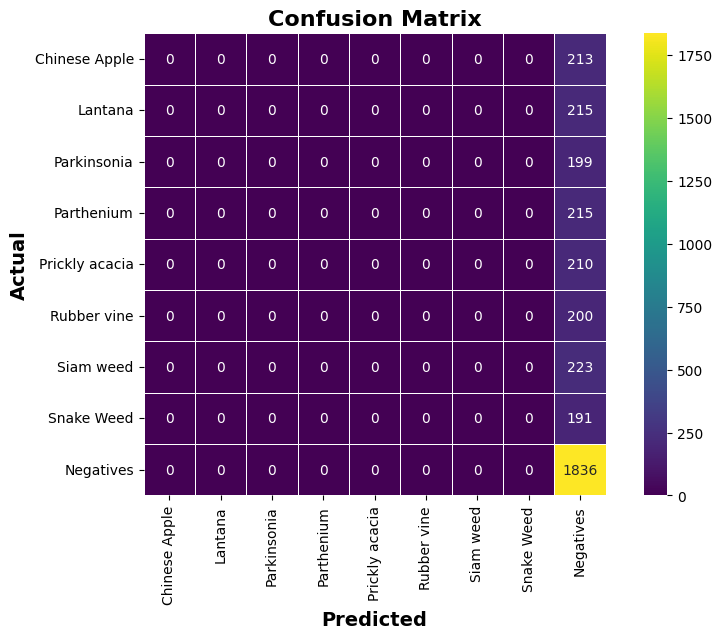

In [9]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lg)

plt.figure(figsize=(10, 6))

sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=['Chinese Apple', 'Lantana', 'Parkinsonia', 'Parthenium', 
                'Prickly acacia', 'Rubber vine', 'Siam weed', 'Snake Weed', 'Negatives'],
    yticklabels=['Chinese Apple', 'Lantana', 'Parkinsonia', 'Parthenium', 
                'Prickly acacia', 'Rubber vine', 'Siam weed', 'Snake Weed', 'Negatives']
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()